# O som do átomo de hidrogênio

Inspirado pelo vídeo do [minute physics](https://www.youtube.com/watch?v=qyi5SvPlMXc) decidi fazer esse mini projeto para  mostrar como fazer projetos envolvendo faixas de som audíveis no próprio navegador, totalmente em python através do Jupyter Notebook.

Para isso, vamos usar o espectro do átomo de hidrogênio, e vamos fazer um shift linear nele para dentro do espectro audível de frequências sonoras. O nome dado a esse processo é [sonificação](https://en.wikipedia.org/wiki/Sonification), você pode usar o link para saber mais caso se interesse. 

In [10]:
%matplotlib inline

In [11]:
from __future__ import division, print_function, absolute_import
import scipy.constants as const
import numpy as np
import scipy

from matplotlib.pyplot import plot
from scipy.io import wavfile
from IPython.core.display import HTML, display

In [12]:
try:
    from IPython.display import Audio
    def wavPlayer(data, rate):
        display(Audio(data, rate=rate))
except ImportError:
    pass

In [118]:
## constantes que vamos usar no arquivo de audio 
from numpy import sin, pi
rate = 44100 # freq = 44.1 khz
duration = 3 # duração do audio

# função para normalizar o seno na amplitude certa para um arquivo wav 
normedsin = lambda f,t : 2**13*sin(2*pi*f*t)

time = np.linspace(0,duration, num=rate*duration)

## Primeiro teste para o wav Player 

Para começar, vamos começar tocando algo em 440 Hz

In [119]:
import numpy
import struct 
import warnings 

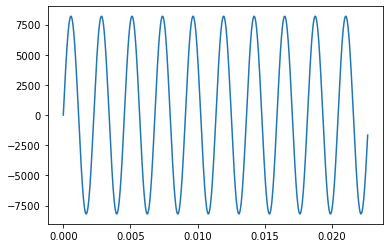

In [120]:
# definindo A como sendo uma função senoide com 440Hz de freq 
la    = lambda t : normedsin(440,t)

# plot rápido da onda nos primeiros 25 ms
plot(time[0:1000], la(time)[0:1000])

ampl = la(time).astype(np.int16)

# função que salva o áudio  e toca ele em HTML5
wavPlayer(ampl, rate)

As diferentes frequências emitidas por um átomo de hidrogênio são analiticamente calculadas através da formula de Rydberg: 

$$\frac{1}{\lambda} = R \left(\frac{1}{n_1} - \frac{1}{n_2}\right)  $$

Como sabemos, essa relação tem um formato muito similar a das freqências emitidas do hidrogênio

$$ f_{n,m} = \frac{c}{\lambda} = \frac{R_h}{h} \left(\frac{1}{n} - \frac{1}{m}\right) $$

Para o caso de $n = 1$ reconhecemos a famosa série de Lyman, e para $n = 2$ a série de Balmer

In [121]:
# freq fundamental hidrogenio
f0 = const.Rydberg*const.c
print("A maior frequência do hidrogênio é ",f0,"Hz. e corresponde a n = 1, m = ∞")
fshift = 440
print("todavia odemos shiftar o espectro para 440 Hz (A)")

A maior frequência do hidrogênio é  3289841960250880.5 Hz. e corresponde a n = 1, m = ∞
todavia odemos shiftar o espectro para 440 Hz (A)


In [122]:
ryd = lambda n,m : fshift*(1/(n**2) -1/(m**2))
flyman = lambda x : ryd(1,x)
fbalmer = lambda x : ryd(2,x)

In [123]:
## vamos definir o somatório, 
ser = lambda t : sum( [normedsin(flyman(i),t)+normedsin(fbalmer(i+1),t) for i in range(2,8)])

# e uma função em forma de vetor para realizar operações em cada um dos seus elementos
serv = scipy.vectorize(ser)

In [124]:
ss= serv(time)

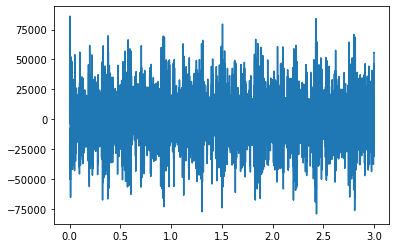

In [125]:
plot(time, ss) 
ss = 2**15*ss/ss.max()

In [126]:
#wavfile.write('hydrogen.wav', rate, ss.astype(np.int16))
wavPlayer(ss.astype(np.int16),rate)